# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
project_data.shape

(50000, 17)

In [4]:
project_data['project_is_approved'].value_counts()

1    42286
0     7714
Name: project_is_approved, dtype: int64

In [5]:
resource_data.shape

(1541272, 4)

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [7]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories project_subject_subcategories  \
473             Applied Learning             Early Development   
41558        Literacy & Language                      Literacy   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
41558                                             2                    1

In [8]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [9]:
print(project_data['project_subject_categories'].head(5))

473                      Applied Learning
41558                 Literacy & Language
29891    Math & Science, History & Civics
23374                 Literacy & Language
49228                 Literacy & Language
Name: project_subject_categories, dtype: object


In [10]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

In [11]:
print(project_data['clean_categories'].head(5))

473                  AppliedLearning
41558              Literacy_Language
29891    Math_Science History_Civics
23374              Literacy_Language
49228              Literacy_Language
Name: clean_categories, dtype: object


## 1.3 preprocessing of `project_subject_subcategories`

In [12]:
print(project_data['project_subject_subcategories'].head(5))

473                 Early Development
41558                        Literacy
29891    Mathematics, Social Sciences
23374                   ESL, Literacy
49228                        Literacy
Name: project_subject_subcategories, dtype: object


In [13]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

In [14]:
print(project_data['clean_subcategories'].head(5))

473                EarlyDevelopment
41558                      Literacy
29891    Mathematics SocialSciences
23374                  ESL Literacy
49228                      Literacy
Name: clean_subcategories, dtype: object


## 1.5 preprocessing of `project_grade_category`

In [15]:
preproc = []
# tqdm is for printing the status bar
for sent in project_data['project_grade_category']:
    sent = sent.replace('Grades ', '')
    sent = sent.replace('PreK-2', 'PreKto2')
    sent = sent.replace('3-5', '3to5')
    sent = sent.replace('6-8', '6to8')
    sent = sent.replace('9-12', '9to12')
    preproc.append(sent)
project_data['project_grade_category']=preproc

In [16]:
print(project_data['project_grade_category'].head(5))

473      PreKto2
41558       3to5
29891       3to5
23374    PreKto2
49228    PreKto2
Name: project_grade_category, dtype: object


## 1.6 preprocessing of `teacher_prefix`

In [17]:
print(type(project_data['teacher_prefix']))

<class 'pandas.core.series.Series'>


In [18]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].astype(str)
preproc = []
# tqdm is for printing the status bar
for sent in project_data['teacher_prefix']:
    sent = sent.replace('Mr.', 'Mr')
    sent = sent.replace('Mrs.', 'Mrs')
    sent = sent.replace('Dr.', 'Dr')
    sent = sent.replace('Ms.', 'Ms')
    sent = sent.replace('nan','Mr')
    preproc.append(sent)
project_data['teacher_prefix']=preproc

In [19]:
project_data['teacher_prefix'].value_counts()

Mrs        26140
Ms         17936
Mr          4861
Teacher     1061
Dr             2
Name: teacher_prefix, dtype: int64

In [20]:
print(project_data['teacher_prefix'].head(5))

473      Mrs
41558    Mrs
29891    Mrs
23374     Ms
49228     Ms
Name: teacher_prefix, dtype: object


## 1.3 Preprocessing of Essays

In [21]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [22]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [24]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:30<00:00, 1622.88it/s]


In [25]:
# after preprocesing
preprocessed_essays[2000]

'teach elementary school 4th 5th grade building small town central illinois next year teaching three different classes students reading language writing spelling classroom students enjoy variety activities including hands collaborative learning order help make information real interesting giving reason practice students wide variety students school 60 students receiving free lunch low income percentage students often require additional help support help make learning valuable real world teachers work hard collaborate order help students achieve highest level community supportive schools lately lower levels state support many local businesses cut back individual assistance classrooms order continue learning projects look support help us next year focusing great deal ela english language arts time 5th grade improving writing across curriculum math science reading language social studies individual marker boards give students ability practice writing skills individually giving ability che

In [26]:
project_data['essay']=preprocessed_essays

<h2> 1.4 Preprocessing of `project_title`</h2>

In [27]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 37286.08it/s]


In [28]:
project_data['project_title']=preprocessed_titles

## 1.5 Preparing data for models

In [29]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

   - school_state : categorical data
   - clean_categories : categorical data
   - clean_subcategories : categorical data
   - project_grade_category : categorical data
   - teacher_prefix : categorical data
   
   
   
   
   
   - project_title : text data
   - text : text data
   - project_resource_summary: text data (optinal)
   
   
   
   
   
   
   - quantity : numerical (optinal)
   - teacher_number_of_previously_posted_projects : numerical
   - price : numerical

In [30]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f,encoding = "ISO-8859-1")
    glove_words =  set(model.keys())

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [31]:
train_data = project_data.iloc[:40000]
test_data = project_data.iloc[40000:]

In [32]:
train_data.shape

(40000, 18)

In [33]:
test_data.shape

(10000, 18)

In [34]:
y_train=train_data['project_is_approved']

In [35]:
y_test=test_data['project_is_approved']

In [36]:
X_train=train_data.copy()

In [37]:
X_test=test_data.copy()

In [38]:
X_train.drop(['project_is_approved'],axis=1,inplace=True)

In [39]:
X_test.drop(['project_is_approved'],axis=1,inplace=True)

In [40]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(40000, 17) (40000,)
(10000, 17) (10000,)


<h2>2.3 Make Data Model Ready: encoding numerical and categorical features</h2>

### Vectorizing Numerical features

In [41]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

In [42]:
price_data.head(5)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [43]:
X_train=pd.merge(X_train,price_data,on='id',how='left')
X_test=pd.merge(X_test,price_data,on='id',how='left')

In [44]:
X_train=X_train.fillna(0)
X_test=X_test.fillna(0)

<h4>Normalizing the numerical features: Price</h4>

In [45]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(40000, 1) (40000,)
(10000, 1) (10000,)


<h4>Normalizing the numerical features: Number of previously posted projects </h4>

In [46]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_project_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_project_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_project_norm.shape, y_train.shape)
print(X_test_project_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(40000, 1) (40000,)
(10000, 1) (10000,)


# Vectorizing Categorical features using Response Coding

- school_state : categorical data
- clean_categories : categorical data
- clean_subcategories : categorical data
- project_grade_category : categorical data
- teacher_prefix : categorical data

<h4>Vectorizing Categorical features: project grade category </h4>

In [47]:
cat = train_data['project_grade_category'].unique()
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['project_grade_category'] == i and row['project_is_approved']==1:
            count=count+1
    freqP.append(count)
    count=0

In [48]:
cat = train_data['project_grade_category'].unique()
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['project_grade_category'] == i and row['project_is_approved']==0:
            count=count+1
    freqN.append(count)
    count=0

In [49]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i]))
encodedN = []
encodedN[:] = [1 - x for x in encodedP]
encodedPVAL = dict(zip(cat, encodedP))
encodedNVAL = dict(zip(cat, encodedN))

In [50]:
grade_pos_encode_train = X_train['project_grade_category'].map(encodedPVAL)
grade_neg_encode_train = X_train['project_grade_category'].map(encodedNVAL)

In [51]:
grade_pos_encode_test=X_test['project_grade_category'].map(encodedPVAL)
grade_neg_encode_test=X_test['project_grade_category'].map(encodedNVAL)

<h4>Vectorizing Categorical features: teacher prefix </h4>

In [52]:
train_data['teacher_prefix'].value_counts()

Mrs        20980
Ms         14283
Mr          3886
Teacher      850
Dr             1
Name: teacher_prefix, dtype: int64

In [53]:
%%time
cat = train_data['teacher_prefix'].unique()
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['teacher_prefix'] == i and row['project_is_approved']==1:
            count=count+1
    freqP.append(count)
    count=0

CPU times: user 11.2 s, sys: 11.3 ms, total: 11.3 s
Wall time: 11.3 s


In [54]:
%%time
cat = train_data['teacher_prefix'].unique()
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['teacher_prefix'] == i and row['project_is_approved']==0:
            count=count+1
    freqN.append(count)
    count=0

CPU times: user 11.2 s, sys: 0 ns, total: 11.2 s
Wall time: 11.2 s


In [55]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i]))
encodedN = []
encodedN[:] = [1 - x for x in encodedP]
encodedPVAL = dict(zip(cat, encodedP))
encodedNVAL = dict(zip(cat, encodedN))

In [56]:
teacher_pos_encode_train = X_train['teacher_prefix'].map(encodedPVAL)
teacher_neg_encode_train = X_train['teacher_prefix'].map(encodedNVAL)

In [57]:
teacher_pos_encode_test=X_test['teacher_prefix'].map(encodedPVAL)
teacher_neg_encode_test=X_test['teacher_prefix'].map(encodedNVAL)

<h4>Vectorizing Categorical features: school state </h4>

In [58]:
%%time
cat = train_data['school_state'].unique()
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['school_state'] == i and row['project_is_approved']==1:
            count=count+1
    freqP.append(count)
    count=0

CPU times: user 1min 51s, sys: 14.4 ms, total: 1min 51s
Wall time: 1min 51s


In [59]:
%%time
cat = train_data['school_state'].unique()
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['school_state'] == i and row['project_is_approved']==0:
            count=count+1
    freqN.append(count)
    count=0

CPU times: user 1min 51s, sys: 7.57 ms, total: 1min 51s
Wall time: 1min 51s


In [60]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i]))
encodedN = []
encodedN[:] = [1 - x for x in encodedP]
encodedPVAL = dict(zip(cat, encodedP))
encodedNVAL = dict(zip(cat, encodedN))

In [61]:
state_pos_encode_train = X_train['school_state'].map(encodedPVAL)
state_neg_encode_train = X_train['school_state'].map(encodedNVAL)

In [62]:
state_pos_encode_test=X_test['school_state'].map(encodedPVAL)
state_neg_encode_test=X_test['school_state'].map(encodedNVAL)

<h4>Vectorizing Categorical features: clean categories </h4>

In [63]:
%%time
cat = train_data['clean_categories'].unique()
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['clean_categories'] == i and row['project_is_approved']==1:
            count=count+1
    freqP.append(count)
    count=0

CPU times: user 1min 49s, sys: 7.82 ms, total: 1min 49s
Wall time: 1min 49s


In [64]:
%%time
cat = train_data['clean_categories'].unique()
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['clean_categories'] == i and row['project_is_approved']==0:
            count=count+1
    freqN.append(count)
    count=0

CPU times: user 1min 48s, sys: 11.9 ms, total: 1min 48s
Wall time: 1min 48s


In [65]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i]))
encodedN = []
encodedN[:] = [1 - x for x in encodedP]
encodedPVAL = dict(zip(cat, encodedP))
encodedNVAL = dict(zip(cat, encodedN))

In [66]:
cat_pos_encode_train = X_train['clean_categories'].map(encodedPVAL)
cat_neg_encode_train = X_train['clean_categories'].map(encodedNVAL)

In [67]:
cat_pos_encode_test=X_test['clean_categories'].map(encodedPVAL)
cat_neg_encode_test=X_test['clean_categories'].map(encodedNVAL)

<h4>Vectorizing Categorical features: clean subcategories </h4>

In [71]:
%%time
cat = train_data['clean_subcategories'].unique()
count=0
freqP = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['clean_subcategories'] == i and row['project_is_approved']==1:
            count=count+1
    freqP.append(count)
    count=0

CPU times: user 13min 27s, sys: 59.7 ms, total: 13min 27s
Wall time: 13min 27s


In [72]:
%%time
cat = train_data['clean_subcategories'].unique()
count=0
freqN = []
for i in cat:
    for index,row in train_data.iterrows():
        if row['clean_subcategories'] == i and row['project_is_approved']==0:
            count=count+1
    freqN.append(count)
    count=0

CPU times: user 13min 28s, sys: 47.9 ms, total: 13min 28s
Wall time: 13min 28s


In [73]:
encodedP = []
for i in range(len(cat)) :
    encodedP.append(freqP[i]/(freqP[i] + freqN[i]))
encodedN = []
encodedN[:] = [1 - x for x in encodedP]
encodedPVAL = dict(zip(cat, encodedP))
encodedNVAL = dict(zip(cat, encodedN))

In [74]:
sub_pos_encode_train = X_train['clean_subcategories'].map(encodedPVAL)
sub_neg_encode_train = X_train['clean_subcategories'].map(encodedNVAL)

In [75]:
sub_pos_encode_test=X_test['clean_subcategories'].map(encodedPVAL)
sub_neg_encode_test=X_test['clean_subcategories'].map(encodedNVAL)

<h2>2.2 Make Data Model Ready: encoding eassay, and project_title</h2>

<h3>Encoding of Text Data</h3>

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

<h4>BOW of Essay</h4>

In [77]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [78]:
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [79]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)

In [80]:
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

In [81]:
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(40000, 5000) (40000,)
(10000, 5000) (10000,)


<h4>BOW of Title</h4>

In [82]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [83]:
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [84]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)

In [85]:
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

In [86]:
print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(40000, 3436) (40000,)
(10000, 3436) (10000,)


<h4>TFIDF of Essay</h4>

In [87]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [88]:
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [89]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)

In [90]:
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

In [91]:
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(40000, 5000) (40000,)
(10000, 5000) (10000,)


<h4>TFIDF of Title</h4>

In [92]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [93]:
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [94]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)

In [95]:
X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

In [96]:
print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(40000, 3436) (40000,)
(10000, 3436) (10000,)


<h4>Avg W2V of Essay</h4>

In [97]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_train.append(vector)
print(len(avg_w2v_essay_train))
print(len(avg_w2v_essay_train[0]))
print(type(avg_w2v_essay_train))

100%|██████████| 40000/40000 [00:11<00:00, 3617.32it/s]

40000
300
<class 'list'>


In [98]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_test.append(vector)
print(len(avg_w2v_essay_test))
print(len(avg_w2v_essay_test[0]))
print(type(avg_w2v_essay_test))

100%|██████████| 10000/10000 [00:02<00:00, 3721.72it/s]

10000
300
<class 'list'>


<h4>Avg W2V of Title</h4>

In [99]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_train.append(vector)

print(len(avg_w2v_title_train))
print(len(avg_w2v_title_train[0]))
print(type(avg_w2v_title_train))

100%|██████████| 40000/40000 [00:00<00:00, 66368.51it/s]

40000
300
<class 'list'>


In [100]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_test.append(vector)

print(len(avg_w2v_title_test))
print(len(avg_w2v_title_test[0]))
print(type(avg_w2v_title_test))

100%|██████████| 10000/10000 [00:00<00:00, 65199.31it/s]

10000
300
<class 'list'>


<h4>TFIDF-W2V of Essay</h4>

In [101]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [102]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_essay.append(vector)

print(len(tfidf_w2v_train_essay))
print(len(tfidf_w2v_train_essay[0]))

100%|██████████| 40000/40000 [01:00<00:00, 661.20it/s]

40000
300


In [103]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_essay.append(vector)

print(len(tfidf_w2v_test_essay))
print(len(tfidf_w2v_test_essay[0]))

100%|██████████| 10000/10000 [00:14<00:00, 667.47it/s]

10000
300


<h4>TFIDF-W2V of Title</h4>

In [104]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [105]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_title.append(vector)

print(len(tfidf_w2v_train_title))
print(len(tfidf_w2v_train_title[0]))

100%|██████████| 40000/40000 [00:01<00:00, 34423.90it/s]

40000
300


In [106]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_title.append(vector)

print(len(tfidf_w2v_test_title))
print(len(tfidf_w2v_test_title[0]))

100%|██████████| 10000/10000 [00:00<00:00, 31824.82it/s]

10000
300


# Applying DT on BOW,<font color='red'> SET 1</font>

### Creating Data Matrix

In [107]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_title_bow,grade_pos_encode_train.reshape(40000,1),grade_neg_encode_train.reshape(40000,1),teacher_pos_encode_train.reshape(40000,1),teacher_neg_encode_train.reshape(40000,1),state_pos_encode_train.reshape(40000,1),state_neg_encode_train.reshape(40000,1),cat_pos_encode_train.reshape(40000,1),cat_neg_encode_train.reshape(40000,1),sub_pos_encode_train.reshape(40000,1),sub_neg_encode_train.reshape(40000,1),X_train_price_norm,X_train_project_norm))
X_te = hstack((X_test_essay_bow,X_test_title_bow,grade_pos_encode_test.reshape(10000,1),grade_neg_encode_test.reshape(10000,1),teacher_pos_encode_test.reshape(10000,1),teacher_neg_encode_test.reshape(10000,1),state_pos_encode_test.reshape(10000,1),state_neg_encode_test.reshape(10000,1),cat_pos_encode_test.reshape(10000,1),cat_neg_encode_test.reshape(10000,1),sub_pos_encode_test.reshape(10000,1),sub_neg_encode_test.reshape(10000,1),X_test_price_norm,X_test_project_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(40000, 8448) (40000,)
(10000, 8448) (10000,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [108]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
ens=RandomForestClassifier(class_weight='balanced')
parameters = {'max_depth': [1,5,10,50], 'n_estimators': [5, 10,15]}

classifier = GridSearchCV(ens, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 1min 1s, sys: 3.73 s, total: 1min 5s
Wall time: 1min 6s


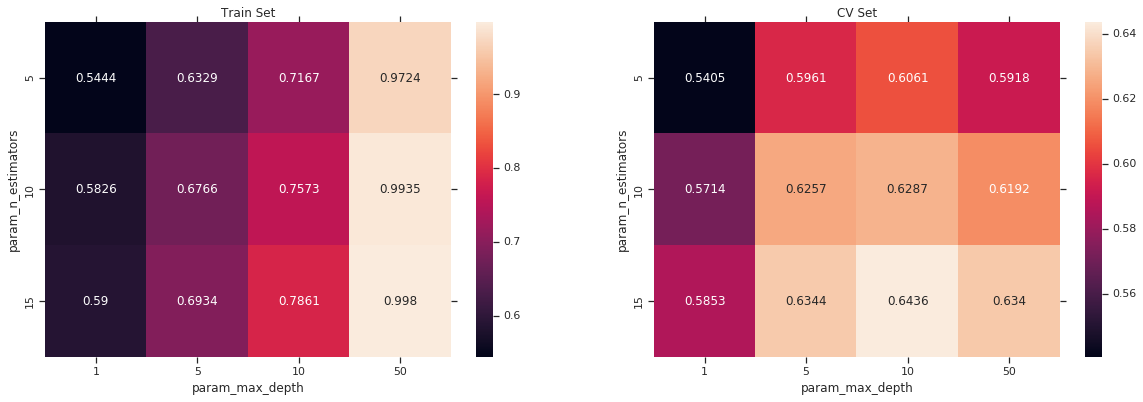

In [109]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [110]:
X_te.data = np.nan_to_num(X_te.data)

In [111]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [112]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


classifier = RandomForestClassifier(max_depth = 10, n_estimators = 15,class_weight='balanced')

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr)    
y_test_pred = classifier.predict_proba(X_te)

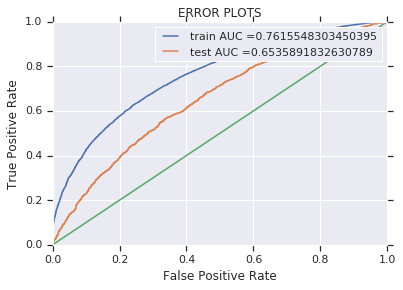

In [113]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [114]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999365089445 for threshold 0.477


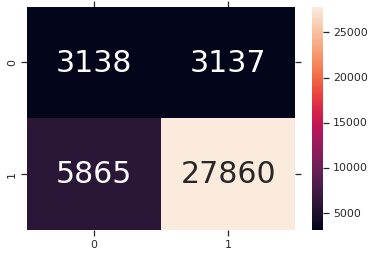

In [115]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred[:,1],tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499998792691048 for threshold 0.533


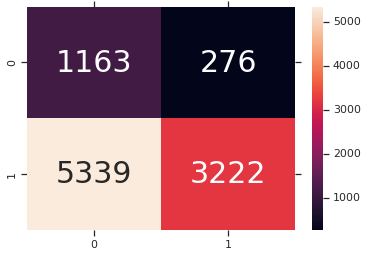

In [116]:
#conf_matr_df_train_2[1][0]
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred[:,1],tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

# Applying DT on TFIDF,<font color='red'> SET 2</font>

### Creating Data Matrix

In [117]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf,grade_pos_encode_train.reshape(40000,1),grade_neg_encode_train.reshape(40000,1),teacher_pos_encode_train.reshape(40000,1),teacher_neg_encode_train.reshape(40000,1),state_pos_encode_train.reshape(40000,1),state_neg_encode_train.reshape(40000,1),cat_pos_encode_train.reshape(40000,1),cat_neg_encode_train.reshape(40000,1),sub_pos_encode_train.reshape(40000,1),sub_neg_encode_train.reshape(40000,1),X_train_price_norm,X_train_project_norm))
X_te = hstack((X_test_essay_tfidf,X_test_title_tfidf,grade_pos_encode_test.reshape(10000,1),grade_neg_encode_test.reshape(10000,1),teacher_pos_encode_test.reshape(10000,1),teacher_neg_encode_test.reshape(10000,1),state_pos_encode_test.reshape(10000,1),state_neg_encode_test.reshape(10000,1),cat_pos_encode_test.reshape(10000,1),cat_neg_encode_test.reshape(10000,1),sub_pos_encode_test.reshape(10000,1),sub_neg_encode_test.reshape(10000,1),X_test_price_norm,X_test_project_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(40000, 8448) (40000,)
(10000, 8448) (10000,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [118]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
ens=RandomForestClassifier(class_weight='balanced')
parameters = {'max_depth': [1,5,10,15], 'n_estimators': [5, 10,15]}

classifier = GridSearchCV(ens, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 35.1 s, sys: 2.84 s, total: 37.9 s
Wall time: 37.9 s


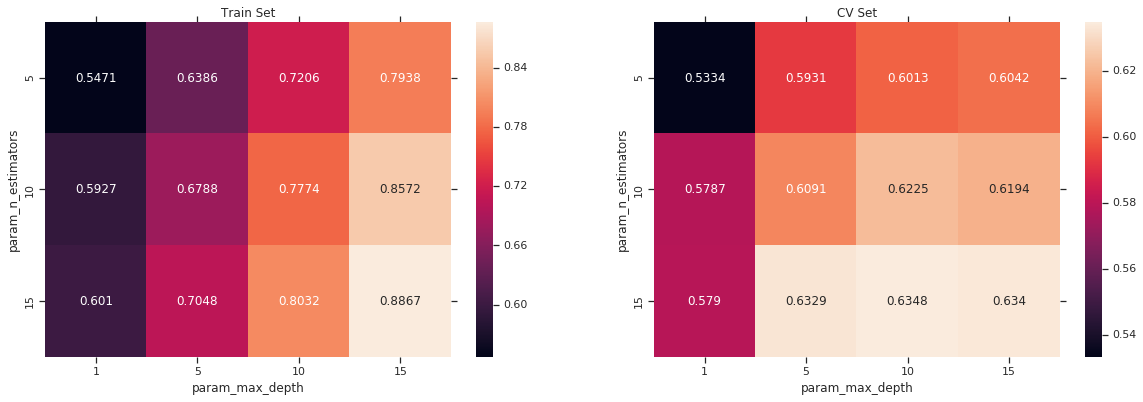

In [119]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [120]:
X_te.data = np.nan_to_num(X_te.data)

In [121]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [152]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


classifier = RandomForestClassifier(max_depth = 10, n_estimators = 15,class_weight='balanced')

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr)    
y_test_pred = classifier.predict_proba(X_te)

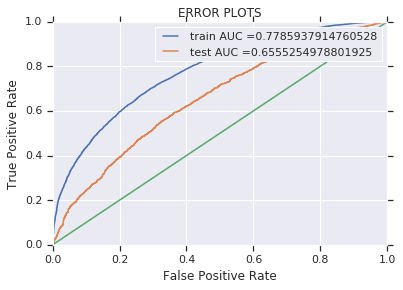

In [153]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [154]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999365089445 for threshold 0.482


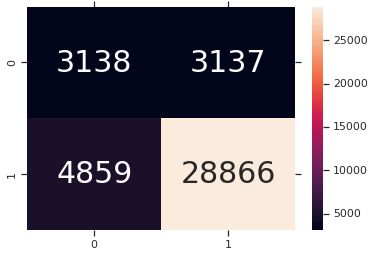

In [155]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred[:,1],tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999987926910483 for threshold 0.538


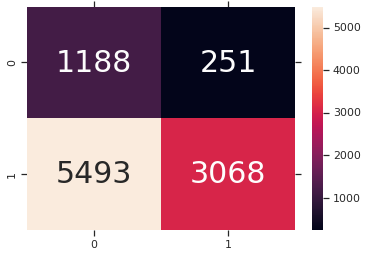

In [156]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred[:,1],tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

# Applying DT on AVG W2V,<font color='red'> SET 3</font>

### Creating Data Matrix

In [157]:
from scipy.sparse import csr_matrix

In [158]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((csr_matrix(avg_w2v_essay_train),csr_matrix(avg_w2v_title_train),grade_pos_encode_train.reshape(40000,1),grade_neg_encode_train.reshape(40000,1),teacher_pos_encode_train.reshape(40000,1),teacher_neg_encode_train.reshape(40000,1),state_pos_encode_train.reshape(40000,1),state_neg_encode_train.reshape(40000,1),cat_pos_encode_train.reshape(40000,1),cat_neg_encode_train.reshape(40000,1),sub_pos_encode_train.reshape(40000,1),sub_neg_encode_train.reshape(40000,1),X_train_price_norm,X_train_project_norm))
X_te = hstack((csr_matrix(avg_w2v_essay_test),csr_matrix(avg_w2v_title_test),grade_pos_encode_test.reshape(10000,1),grade_neg_encode_test.reshape(10000,1),teacher_pos_encode_test.reshape(10000,1),teacher_neg_encode_test.reshape(10000,1),state_pos_encode_test.reshape(10000,1),state_neg_encode_test.reshape(10000,1),cat_pos_encode_test.reshape(10000,1),cat_neg_encode_test.reshape(10000,1),sub_pos_encode_test.reshape(10000,1),sub_neg_encode_test.reshape(10000,1),X_test_price_norm,X_test_project_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(40000, 612) (40000,)
(10000, 612) (10000,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [159]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
ens=RandomForestClassifier(class_weight='balanced')
parameters = {'max_depth': [1,5,10,15], 'n_estimators': [5, 10,15]}

classifier = GridSearchCV(ens, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 6min 21s, sys: 16.6 s, total: 6min 37s
Wall time: 6min 37s


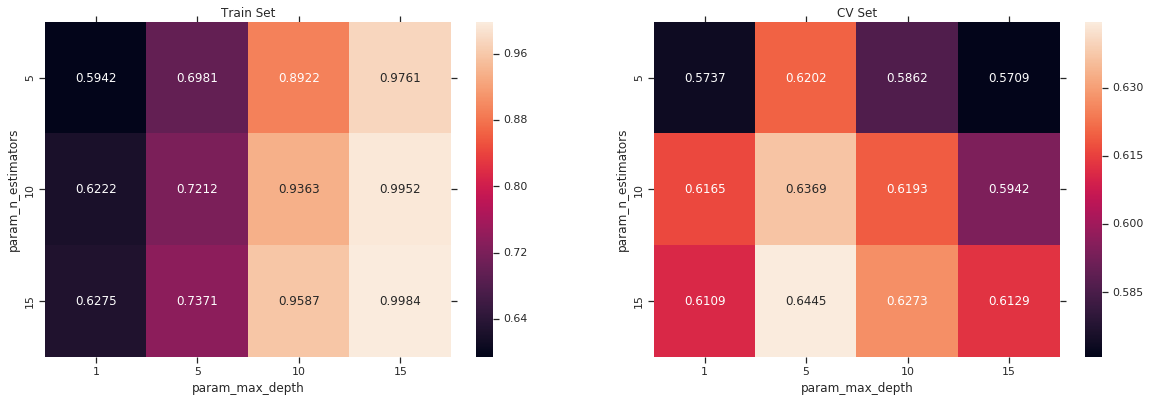

In [160]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [161]:
X_te.data = np.nan_to_num(X_te.data)

In [162]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [167]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


classifier = RandomForestClassifier(max_depth = , n_estimators = 15)

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr)    
y_test_pred = classifier.predict_proba(X_te)

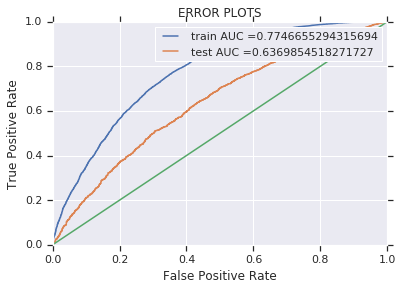

In [168]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [169]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999365089445 for threshold 0.807


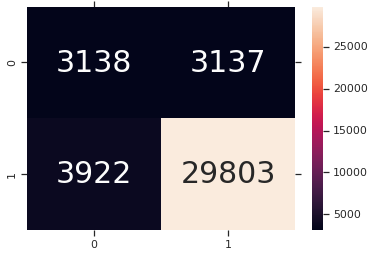

In [170]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred[:,1],tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499998792691048 for threshold 0.87


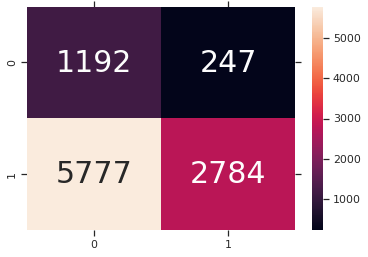

In [171]:
#conf_matr_df_train_2[1][0]
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred[:,1],tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

# Applying DT on TFIDF W2V,<font color='red'> SET 4</font>

### Creating Data Matrix

In [172]:
from scipy.sparse import csr_matrix

In [173]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((csr_matrix(tfidf_w2v_train_essay),csr_matrix(tfidf_w2v_train_title),grade_pos_encode_train.reshape(40000,1),grade_neg_encode_train.reshape(40000,1),teacher_pos_encode_train.reshape(40000,1),teacher_neg_encode_train.reshape(40000,1),state_pos_encode_train.reshape(40000,1),state_neg_encode_train.reshape(40000,1),cat_pos_encode_train.reshape(40000,1),cat_neg_encode_train.reshape(40000,1),sub_pos_encode_train.reshape(40000,1),sub_neg_encode_train.reshape(40000,1),X_train_price_norm,X_train_project_norm))
X_te = hstack((csr_matrix(tfidf_w2v_test_essay),csr_matrix(tfidf_w2v_test_title),grade_pos_encode_test.reshape(10000,1),grade_neg_encode_test.reshape(10000,1),teacher_pos_encode_test.reshape(10000,1),teacher_neg_encode_test.reshape(10000,1),state_pos_encode_test.reshape(10000,1),state_neg_encode_test.reshape(10000,1),cat_pos_encode_test.reshape(10000,1),cat_neg_encode_test.reshape(10000,1),sub_pos_encode_test.reshape(10000,1),sub_neg_encode_test.reshape(10000,1),X_test_price_norm,X_test_project_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(40000, 612) (40000,)
(10000, 612) (10000,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [174]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
ens=RandomForestClassifier(class_weight='balanced')
parameters = {'max_depth': [1,5,10,15], 'n_estimators': [5, 10,15]}

classifier = GridSearchCV(ens, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 6min 24s, sys: 12.4 s, total: 6min 36s
Wall time: 6min 36s


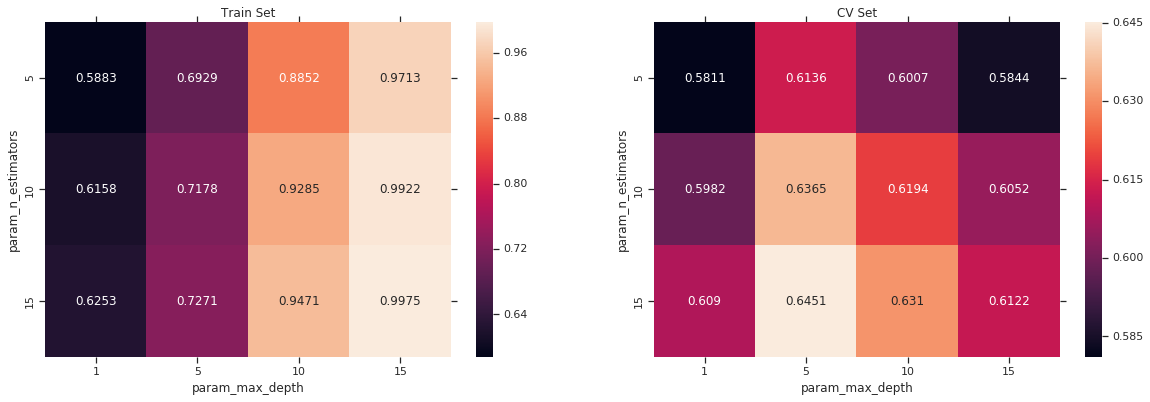

In [175]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [176]:
X_te.data = np.nan_to_num(X_te.data)

In [177]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [188]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


classifier = RandomForestClassifier(max_depth = 5, n_estimators = 15,class_weight='balanced')

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr)    
y_test_pred = classifier.predict_proba(X_te)

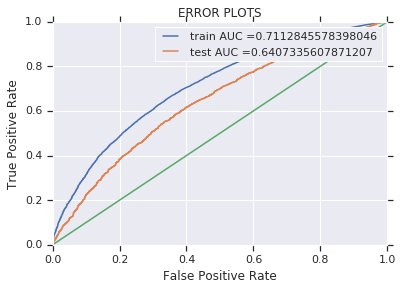

In [189]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [190]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999365089445 for threshold 0.47


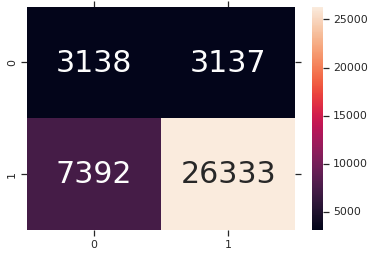

In [191]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred[:,1],tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499998792691048 for threshold 0.558


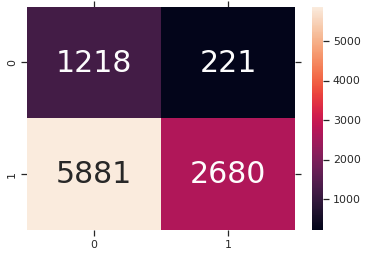

In [192]:
#conf_matr_df_train_2[1][0]
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred[:,1],tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

<h2>Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

### Creating Data Matrix

In [214]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_title_bow,grade_pos_encode_train.reshape(40000,1),grade_neg_encode_train.reshape(40000,1),teacher_pos_encode_train.reshape(40000,1),teacher_neg_encode_train.reshape(40000,1),state_pos_encode_train.reshape(40000,1),state_neg_encode_train.reshape(40000,1),cat_pos_encode_train.reshape(40000,1),cat_neg_encode_train.reshape(40000,1),sub_pos_encode_train.reshape(40000,1),sub_neg_encode_train.reshape(40000,1),X_train_price_norm,X_train_project_norm))
X_te = hstack((X_test_essay_bow,X_test_title_bow,grade_pos_encode_test.reshape(10000,1),grade_neg_encode_test.reshape(10000,1),teacher_pos_encode_test.reshape(10000,1),teacher_neg_encode_test.reshape(10000,1),state_pos_encode_test.reshape(10000,1),state_neg_encode_test.reshape(10000,1),cat_pos_encode_test.reshape(10000,1),cat_neg_encode_test.reshape(10000,1),sub_pos_encode_test.reshape(10000,1),sub_neg_encode_test.reshape(10000,1),X_test_price_norm,X_test_project_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(40000, 8448) (40000,)
(10000, 8448) (10000,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [215]:
from xgboost import XGBClassifier

In [216]:
%%time
from sklearn.model_selection import GridSearchCV
ens=XGBClassifier()
parameters = {'max_depth': [1,5,10], 'n_estimators': [5, 10,15]}

classifier = GridSearchCV(ens, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 2min 37s, sys: 1.72 s, total: 2min 39s
Wall time: 2min 39s


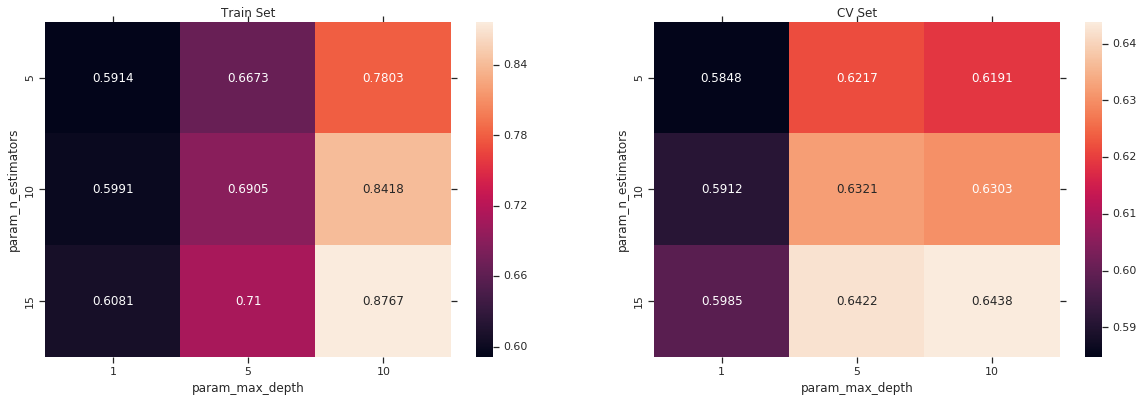

In [217]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [218]:
X_te.data = np.nan_to_num(X_te.data)

In [219]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [222]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


classifier = XGBClassifier(max_depth = 5, n_estimators = 15)

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr)    
y_test_pred = classifier.predict_proba(X_te)

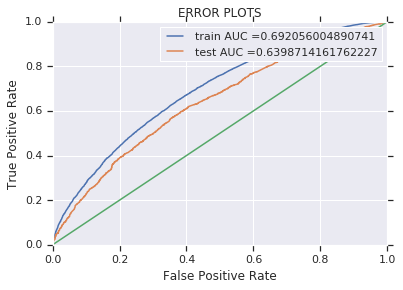

In [223]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [224]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999892700115872 for threshold 0.751


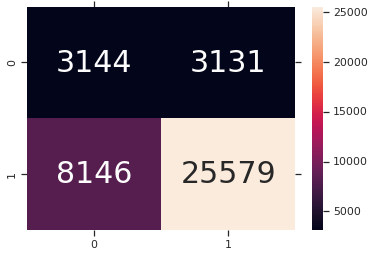

In [225]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred[:,1],tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999987926910483 for threshold 0.801


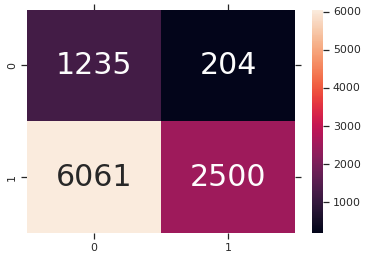

In [226]:
#conf_matr_df_train_2[1][0]
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred[:,1],tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

### Creating Data Matrix

In [227]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf,grade_pos_encode_train.reshape(40000,1),grade_neg_encode_train.reshape(40000,1),teacher_pos_encode_train.reshape(40000,1),teacher_neg_encode_train.reshape(40000,1),state_pos_encode_train.reshape(40000,1),state_neg_encode_train.reshape(40000,1),cat_pos_encode_train.reshape(40000,1),cat_neg_encode_train.reshape(40000,1),sub_pos_encode_train.reshape(40000,1),sub_neg_encode_train.reshape(40000,1),X_train_price_norm,X_train_project_norm))
X_te = hstack((X_test_essay_tfidf,X_test_title_tfidf,grade_pos_encode_test.reshape(10000,1),grade_neg_encode_test.reshape(10000,1),teacher_pos_encode_test.reshape(10000,1),teacher_neg_encode_test.reshape(10000,1),state_pos_encode_test.reshape(10000,1),state_neg_encode_test.reshape(10000,1),cat_pos_encode_test.reshape(10000,1),cat_neg_encode_test.reshape(10000,1),sub_pos_encode_test.reshape(10000,1),sub_neg_encode_test.reshape(10000,1),X_test_price_norm,X_test_project_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(40000, 8448) (40000,)
(10000, 8448) (10000,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [228]:
from xgboost import XGBClassifier

In [229]:
%%time
from sklearn.model_selection import GridSearchCV
ens=XGBClassifier()
parameters = {'max_depth': [1,5,10], 'n_estimators': [5, 10,15]}

classifier = GridSearchCV(ens, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 4min 46s, sys: 1.37 s, total: 4min 47s
Wall time: 4min 47s


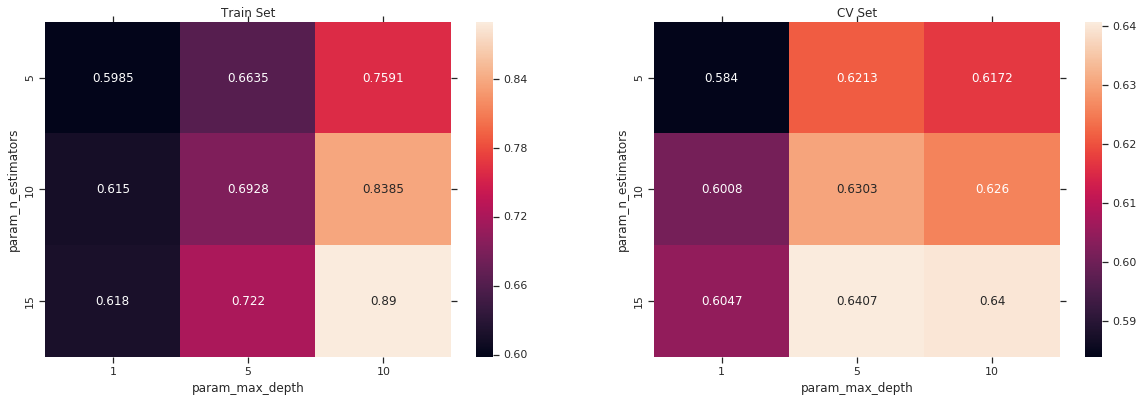

In [230]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [231]:
X_te.data = np.nan_to_num(X_te.data)

In [232]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [233]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


classifier = XGBClassifier(max_depth = 5, n_estimators = 15)

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr)    
y_test_pred = classifier.predict_proba(X_te)

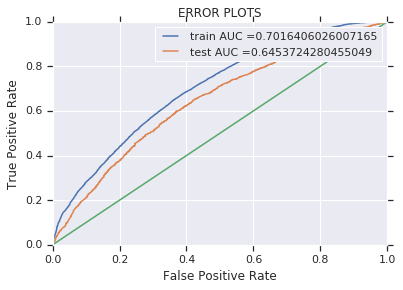

In [234]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [235]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999365089445 for threshold 0.753


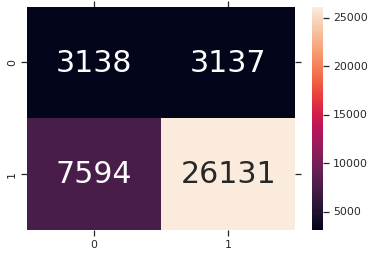

In [236]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred[:,1],tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999987926910483 for threshold 0.798


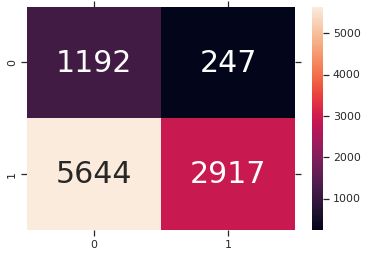

In [237]:
#conf_matr_df_train_2[1][0]
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred[:,1],tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

### Creating Data Matrix

In [105]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
X_tr = hstack((csr_matrix(avg_w2v_essay_train),csr_matrix(avg_w2v_title_train),grade_pos_encode_train.reshape(40000,1),grade_neg_encode_train.reshape(40000,1),teacher_pos_encode_train.reshape(40000,1),teacher_neg_encode_train.reshape(40000,1),state_pos_encode_train.reshape(40000,1),state_neg_encode_train.reshape(40000,1),cat_pos_encode_train.reshape(40000,1),cat_neg_encode_train.reshape(40000,1),sub_pos_encode_train.reshape(40000,1),sub_neg_encode_train.reshape(40000,1),X_train_price_norm,X_train_project_norm))
X_te = hstack((csr_matrix(avg_w2v_essay_test),csr_matrix(avg_w2v_title_test),grade_pos_encode_test.reshape(10000,1),grade_neg_encode_test.reshape(10000,1),teacher_pos_encode_test.reshape(10000,1),teacher_neg_encode_test.reshape(10000,1),state_pos_encode_test.reshape(10000,1),state_neg_encode_test.reshape(10000,1),cat_pos_encode_test.reshape(10000,1),cat_neg_encode_test.reshape(10000,1),sub_pos_encode_test.reshape(10000,1),sub_neg_encode_test.reshape(10000,1),X_test_price_norm,X_test_project_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(40000, 612) (40000,)
(10000, 612) (10000,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [107]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
ens=XGBClassifier()
parameters = {'max_depth': [1,5,10], 'n_estimators': [5, 10,15]}

classifier = GridSearchCV(ens, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 17min 12s, sys: 30.7 s, total: 17min 43s
Wall time: 17min 42s


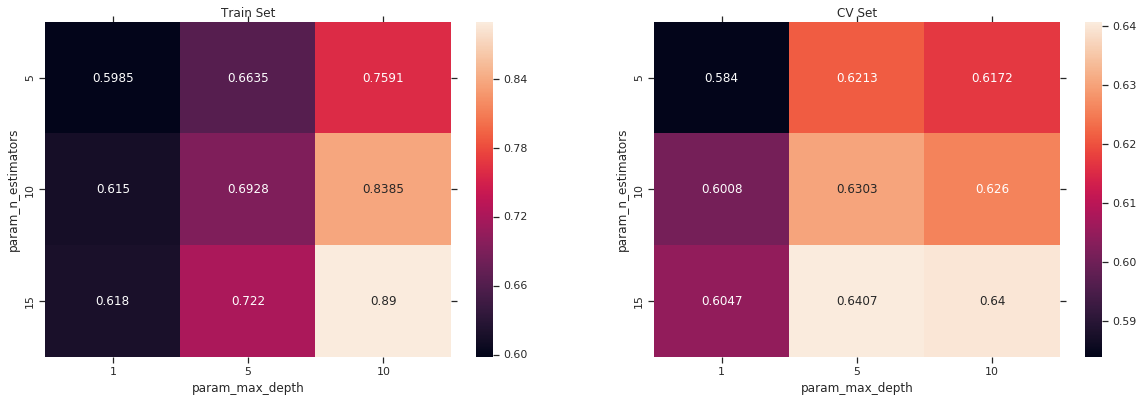

In [230]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [231]:
X_te.data = np.nan_to_num(X_te.data)

In [232]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [233]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


classifier = XGBClassifier(max_depth = 5, n_estimators = 15)

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr)    
y_test_pred = classifier.predict_proba(X_te)

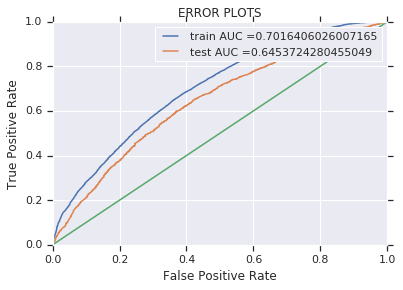

In [234]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [235]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999365089445 for threshold 0.753


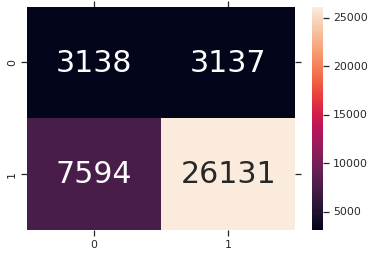

In [236]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred[:,1],tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999987926910483 for threshold 0.798


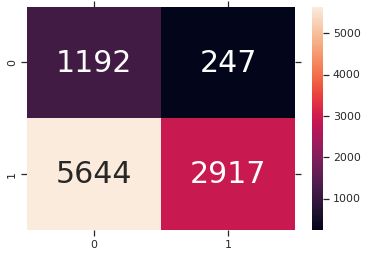

In [237]:
#conf_matr_df_train_2[1][0]
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred[:,1],tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

### Creating Data Matrix

In [108]:

from scipy.sparse import csr_matrix
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((csr_matrix(tfidf_w2v_train_essay),csr_matrix(tfidf_w2v_train_title),grade_pos_encode_train.reshape(40000,1),grade_neg_encode_train.reshape(40000,1),teacher_pos_encode_train.reshape(40000,1),teacher_neg_encode_train.reshape(40000,1),state_pos_encode_train.reshape(40000,1),state_neg_encode_train.reshape(40000,1),cat_pos_encode_train.reshape(40000,1),cat_neg_encode_train.reshape(40000,1),sub_pos_encode_train.reshape(40000,1),sub_neg_encode_train.reshape(40000,1),X_train_price_norm,X_train_project_norm))
X_te = hstack((csr_matrix(tfidf_w2v_test_essay),csr_matrix(tfidf_w2v_test_title),grade_pos_encode_test.reshape(10000,1),grade_neg_encode_test.reshape(10000,1),teacher_pos_encode_test.reshape(10000,1),teacher_neg_encode_test.reshape(10000,1),state_pos_encode_test.reshape(10000,1),state_neg_encode_test.reshape(10000,1),cat_pos_encode_test.reshape(10000,1),cat_neg_encode_test.reshape(10000,1),sub_pos_encode_test.reshape(10000,1),sub_neg_encode_test.reshape(10000,1),X_test_price_norm,X_test_project_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(40000, 612) (40000,)
(10000, 612) (10000,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [109]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
ens=XGBClassifier()
parameters = {'max_depth': [1,5,10], 'n_estimators': [5, 10,15]}

classifier = GridSearchCV(ens, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 17min 3s, sys: 31.1 s, total: 17min 34s
Wall time: 17min 33s


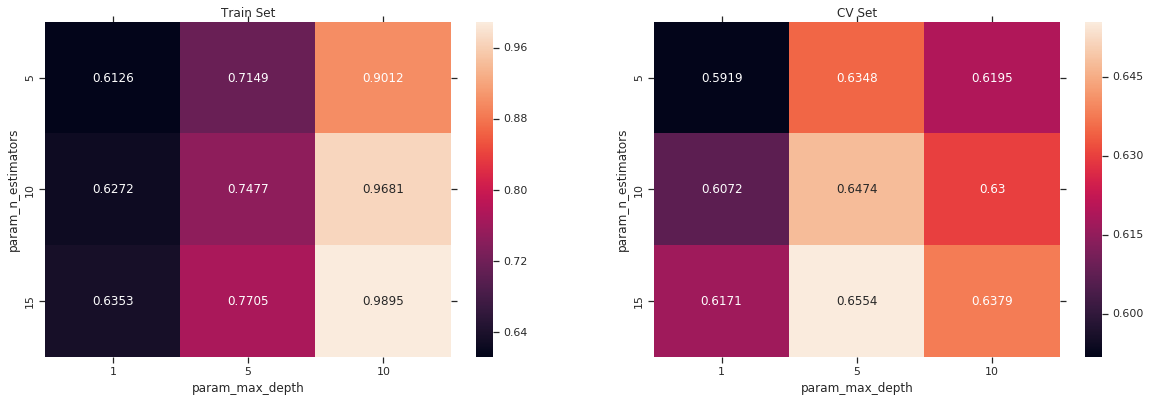

In [110]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [111]:
X_te.data = np.nan_to_num(X_te.data)

In [112]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [113]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


classifier = XGBClassifier(max_depth = 5, n_estimators = 15)

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = classifier.predict_proba(X_tr)    
y_test_pred = classifier.predict_proba(X_te)

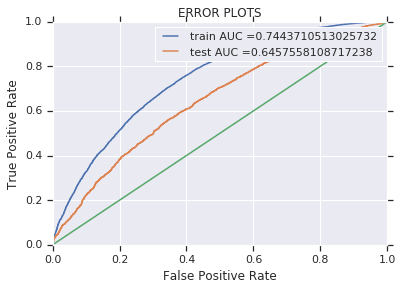

In [114]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [115]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999994285804988 for threshold 0.738


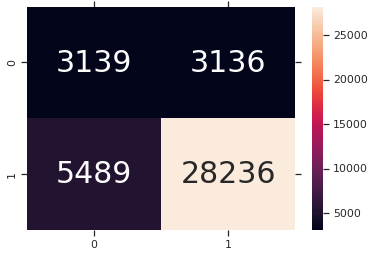

In [116]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred[:,1],tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999987926910483 for threshold 0.813


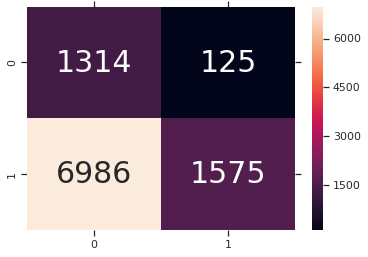

In [119]:
#conf_matr_df_train_2[1][0]
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred[:,1],tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

<h1>3. Conclusions</h1>

In [195]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x=PrettyTable()
x.field_names=["Vectorizer","Model","AUC"]
x.add_row(["BOW","RF",0.66])
x.add_row(["TFIDF","RF",0.66])
x.add_row(["AVG W2V","RF",0.64])
x.add_row(["TFIDF W2V","RF",0.64])
x.add_row(["BOW","GBDT",0.64])
x.add_row(["TFIDF","GBDT",0.65])
x.add_row(["AVG W2V","GBDT",0.65])
x.add_row(["TFIDF W2V","GBDT",0.65])
print(x)

+------------+-------+------+
| Vectorizer | Model | AUC  |
+------------+-------+------+
|    BOW     |   RF  | 0.66 |
|   TFIDF    |   RF  | 0.66 |
|  AVG W2V   |   RF  | 0.64 |
| TFIDF W2V  |   RF  | 0.64 |
|    BOW     |  GBDT | 0.64 |
|   TFIDF    |  GBDT | 0.65 |
|  AVG W2V   |  GBDT | 0.65 |
| TFIDF W2V  |  GBDT | 0.65 |
+------------+-------+------+
